In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download latest version
path1 = kagglehub.dataset_download("pranjal9091/ev-charging-stations-in-india-simplified-2025")

print("Path to dataset files:", path1)

# Download latest version
path2 = kagglehub.dataset_download("mafzal19/electric-vehicle-sales-by-state-in-india")

print("Path to dataset files:", path2)

Path to dataset files: C:\Users\gryff\.cache\kagglehub\datasets\pranjal9091\ev-charging-stations-in-india-simplified-2025\versions\1
Path to dataset files: C:\Users\gryff\.cache\kagglehub\datasets\mafzal19\electric-vehicle-sales-by-state-in-india\versions\1


In [ ]:
ev_charging_stations = pd.read_csv(str(path1) + "/Indian_EV_Stations_Simplified.csv")
ev_charging_stations.head()

,Station Name,City,State,Latitude,Longitude,Operator,Usage Type,Connector Type,Power (kW)
0,Tata.ev Luxon Motors - Tata Power,Edappally,Kerala,10.011485,76.311387,Tata Power,Public - Membership Required,CCS (Type 2),60.0
1,TML Sree Gokulam Motors - Tata Power,Edappally,Kerala,10.039155,76.315559,Tata Power,Public - Membership Required,CCS (Type 2),30.0
2,Tata.ev Gokulam Motors - Tata Power,Choornikkara,Kerala,10.081303,76.339462,Tata Power,Public - Membership Required,CCS (Type 2),60.0
3,Taj Cochin Internation Airport Hotel - Tata Power,Nedumbassery,Kerala,10.159995,76.390154,Tata Power,Public - Membership Required,CCS (Type 2),30.0
4,SAJ Earth Resort - Tata Power,Nedumbassery,Kerala,10.162224,76.384653,Tata Power,Public - Membership Required,CCS (Type 2),30.0


In [ ]:
ev_sales = pd.read_csv(str(path2) + "/EV_Dataset.csv")
ev_sales.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


## Data Exploration and Cleaning

In [ ]:
print("EV Charging Stations Dataset Info:")
print(ev_charging_stations.info())
print("\nMissing values:")
print(ev_charging_stations.isnull().sum())

EV Charging Stations Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Station Name    855 non-null    object 
 1   City            855 non-null    object 
 2   State           854 non-null    object 
 3   Latitude        855 non-null    float64
 4   Longitude       855 non-null    float64
 5   Operator        855 non-null    object 
 6   Usage Type      855 non-null    object 
 7   Connector Type  855 non-null    object 
 8   Power (kW)      853 non-null    float64
dtypes: float64(3), object(6)
memory usage: 60.2+ KB
None

Missing values:
Station Name      0
City              0
State             1
Latitude          0
Longitude         0
Operator          0
Usage Type        0
Connector Type    0
Power (kW)        2
dtype: int64


In [ ]:
ev_charging_stations = ev_charging_stations.dropna()
print("\nMissing values after cleaning:")
print(ev_charging_stations.isnull().sum())


Missing values after cleaning:
Station Name      0
City              0
State             0
Latitude          0
Longitude         0
Operator          0
Usage Type        0
Connector Type    0
Power (kW)        0
dtype: int64


In [ ]:
print("EV Sales Dataset Info:")
print(ev_sales.info())
print("\nMissing values:")
print(ev_sales.isnull().sum())

EV Sales Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB
None

Missing values:
Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [ ]:
ev_sales = ev_sales.dropna()
print("\nMissing values after cleaning:")
print(ev_sales.isnull().sum())


Missing values after cleaning:
Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [ ]:
# Clean and preprocess charging stations data
print("Original charging stations shape:", ev_charging_stations.shape)

# Check for duplicates
print("Duplicate rows:", ev_charging_stations.duplicated().sum())

Original charging stations shape: (852, 9)
Duplicate rows: 66


In [ ]:
ev_charging_stations = ev_charging_stations.drop_duplicates()
print("EV charging stations shape without duplicates:", ev_charging_stations.shape)

EV charging stations shape without duplicates: (786, 9)


In [ ]:
# Clean state names (remove extra spaces, standardize)
ev_charging_stations['State'] = ev_charging_stations['State'].str.strip().str.title()

# Check unique states and cities
print("\nUnique states:", ev_charging_stations['State'].nunique())
print("States:", sorted(ev_charging_stations['State'].unique()))

print("\nUnique cities:", ev_charging_stations['City'].nunique())
print("Sample cities:", sorted(ev_charging_stations['City'].unique())[:10])

# Check connector types and power distribution
print("\nConnector types:")
print(ev_charging_stations['Connector Type'].value_counts())

print("\nPower distribution:")
print(ev_charging_stations['Power (kW)'].describe())


Unique states: 14
States: ['Andhra Pradesh', 'Delhi', 'Karnataka', 'Keraka', 'Keral', 'Kerala', 'Lerala', 'Madhya Pradesh', 'Maharashtra', 'Puducherry', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh', 'West Bengal']

Unique cities: 283
Sample cities: ['Adoor', 'Aikkarapadi', 'Alappuzha', 'Alathur', 'Alliyar', 'Aluva', 'Amballur', 'Anaikatti', 'Angamaly', 'Anthikkad']

Connector types:
Connector Type
CCS (Type 2)                    504
CEE 3 Pin                       124
Type 2 (Tethered Connector)      85
CHAdeMO                          36
GB-T DC - GB/T 20234.3           33
Unknown                           2
IEC 60309 3-pin                   2
Name: count, dtype: int64

Power distribution:
count    786.000000
mean      30.189186
std       20.289079
min        3.200000
25%       22.000000
50%       30.000000
75%       30.000000
max      150.000000
Name: Power (kW), dtype: float64


In [ ]:
# Clean and preprocess EV sales data
print("Original EV sales shape:", ev_sales.shape)

# Check for duplicates
print("Duplicate rows:", ev_sales.duplicated().sum())

Original EV sales shape: (96845, 8)
Duplicate rows: 0


In [ ]:
# Clean state names
ev_sales['State'] = ev_sales['State'].str.strip().str.title()

# Convert date column
ev_sales['Date'] = pd.to_datetime(ev_sales['Date'], errors='coerce')
ev_sales['Year'] = ev_sales['Year'].fillna(0).astype(int)
ev_sales['Month'] = pd.to_datetime(ev_sales['Month_Name'], format='%b', errors='coerce').dt.month
ev_sales['Month'] = ev_sales['Month'].fillna(1).astype(int)

# Filter out zero sales and focus on relevant vehicle categories
ev_sales_clean = ev_sales[ev_sales['EV_Sales_Quantity'] > 0].copy()

# Focus on main vehicle categories
main_categories = ['2-Wheelers', '3-Wheelers', '4-Wheelers', 'Bus']
ev_sales_clean = ev_sales_clean[ev_sales_clean['Vehicle_Category'].isin(main_categories)]

print("\nCleaned EV sales shape:", ev_sales_clean.shape)
print("Year range:", ev_sales_clean['Year'].min(), "-", ev_sales_clean['Year'].max())
print("States:", sorted(ev_sales_clean['State'].unique()))
print("Vehicle categories:", ev_sales_clean['Vehicle_Category'].value_counts())


Cleaned EV sales shape: (12940, 9)
Year range: 2014 - 2024
States: ['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Dnh And Dd', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
Vehicle categories: Vehicle_Category
3-Wheelers    5806
2-Wheelers    4407
4-Wheelers    2409
Bus            318
Name: count, dtype: int64


In [ ]:
ev_charging_stations['State'] = ev_charging_stations['State'].str.strip().str.title()
ev_sales_clean['State'] = ev_sales_clean['State'].str.strip().str.title()

In [ ]:
station_states = set(ev_charging_stations['State'].unique())
sales_states = set(ev_sales['State'].unique())
print(f"\nStates in stations but not in sales: {station_states - sales_states}")
print(f"States in sales but not in stations: {sales_states - station_states}")


States in stations but not in sales: {'Keraka', 'Keral', 'Telangana', 'Lerala'}
States in sales but not in stations: {'Manipur', 'Odisha', 'Sikkim', 'Punjab', 'Meghalaya', 'Chandigarh', 'Gujarat', 'Mizoram', 'Rajasthan', 'Himachal Pradesh', 'Haryana', 'Jharkhand', 'Dnh And Dd', 'Arunachal Pradesh', 'Ladakh', 'Andaman & Nicobar Island', 'Nagaland', 'Assam', 'Uttarakhand', 'Bihar', 'Goa', 'Tripura', 'Chhattisgarh', 'Jammu And Kashmir'}


In [ ]:
# Fix State Name Inconsistencies

# Dictionary of state name corrections
state_corrections = {
    'Keraka': 'Kerala',
    'Keral': 'Kerala',
    'Lerala': 'Kerala'
}

# Apply corrections to charging stations dataset
ev_charging_stations['State'] = ev_charging_stations['State'].replace(state_corrections)

# Verify the corrections
print("States in charging stations dataset after correction:")
print(sorted(ev_charging_stations['State'].unique()))

print("\nStates in EV sales dataset:")
print(sorted(ev_sales['State'].unique()))

# Check for remaining mismatches
station_states = set(ev_charging_stations['State'].unique())
sales_states = set(ev_sales['State'].unique())

print(f"\nStates in stations but not in sales: {station_states - sales_states}")
print(f"States in sales but not in stations: {sales_states - station_states}")

States in charging stations dataset after correction:
['Andhra Pradesh', 'Delhi', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Puducherry', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh', 'West Bengal']

States in EV sales dataset:
['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Dnh And Dd', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

States in stations but not in sales: {'Telangana'}
States in sales but not in stations: {'Manipur', 'Odisha', 'Sikkim', 'Punjab', 'Meghalaya', 'Chandigarh', 'Gujarat', 'Mizoram', 'Rajasthan', 'Himachal Pradesh', 'Haryana', 'Jharkhand', 'Dnh And Dd', 'Arunachal Pradesh', 'Ladakh', 'Andaman & Nic

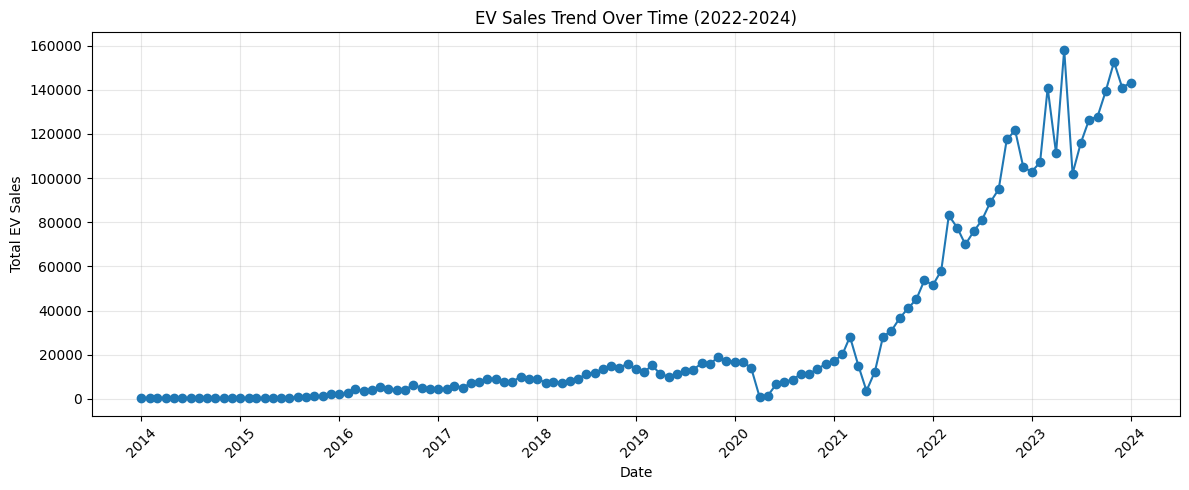

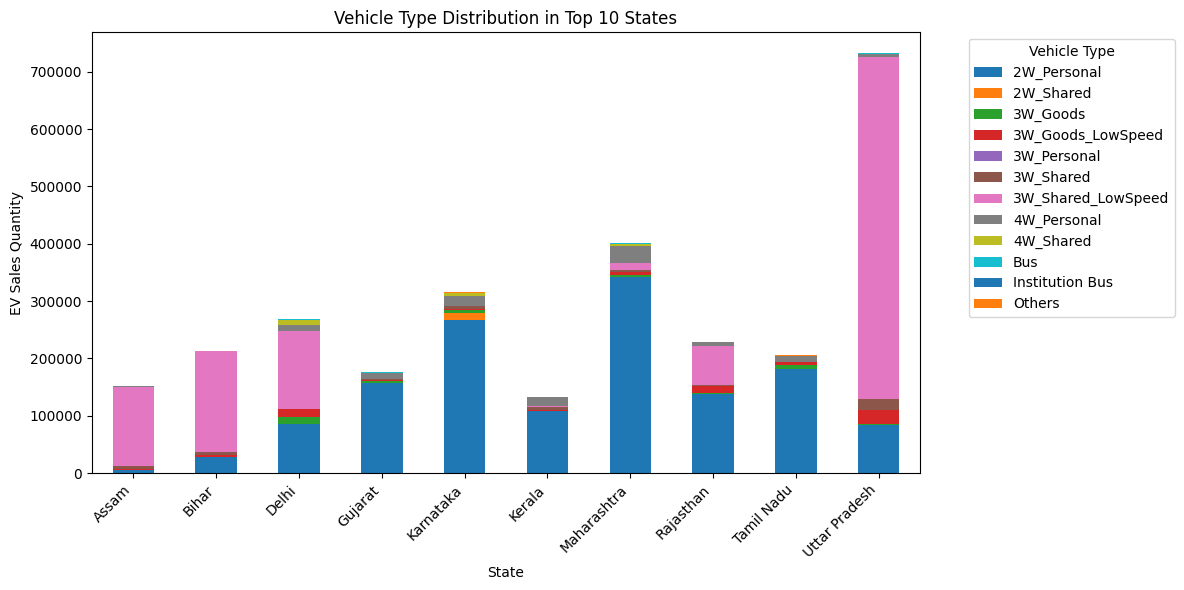

In [ ]:
# Temporal trends in EV sales
ev_sales_temporal = ev_sales.groupby(['Year', 'Month'])['EV_Sales_Quantity'].sum().reset_index()
ev_sales_temporal['Date'] = pd.to_datetime(ev_sales_temporal[['Year', 'Month']].assign(Day=1))

plt.figure(figsize=(12, 5))
plt.plot(ev_sales_temporal['Date'], ev_sales_temporal['EV_Sales_Quantity'], marker='o')
plt.title('EV Sales Trend Over Time (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Total EV Sales')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Vehicle type distribution by state (for top states)
top_states = ev_sales.groupby('State')['EV_Sales_Quantity'].sum().nlargest(10).index
vehicle_type_dist = ev_sales[ev_sales['State'].isin(top_states)].groupby(['State', 'Vehicle_Type'])['EV_Sales_Quantity'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
vehicle_type_dist.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Vehicle Type Distribution in Top 10 States')
plt.xlabel('State')
plt.ylabel('EV Sales Quantity')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Aggregate charging stations by state
stations_by_state = ev_charging_stations.groupby('State').agg({
    'Station Name': 'count',
    'Power (kW)': 'sum'
}).rename(columns={'Station Name': 'Station_Count'}).reset_index()

print("Charging stations by state:")
print(stations_by_state.sort_values('Station_Count', ascending=False))

# Aggregate EV sales by state (using recent years for current demand)
recent_years = [2022, 2023, 2024]
ev_sales_by_state = ev_sales_clean[ev_sales_clean['Year'].isin(recent_years)].groupby('State')['EV_Sales_Quantity'].sum().reset_index()

print("\nEV sales by state (2022-2024):")
print(ev_sales_by_state.sort_values('EV_Sales_Quantity', ascending=False).head(10))

# Merge datasets for gap analysis
gap_analysis = pd.merge(stations_by_state, ev_sales_by_state, on='State', how='outer')

# Fill missing values
gap_analysis['Station_Count'] = gap_analysis['Station_Count'].fillna(0)
gap_analysis['Power (kW)'] = gap_analysis['Power (kW)'].fillna(0)
gap_analysis['EV_Sales_Quantity'] = gap_analysis['EV_Sales_Quantity'].fillna(0)

# Calculate key metrics
gap_analysis['Stations_per_1000_EV'] = (gap_analysis['Station_Count'] / gap_analysis['EV_Sales_Quantity'] * 1000).replace([np.inf, -np.inf], 0)
gap_analysis['kW_per_1000_EV'] = (gap_analysis['Power (kW)'] / gap_analysis['EV_Sales_Quantity'] * 1000).replace([np.inf, -np.inf], 0)

# Calculate charging gap score (inverse of stations per EV, normalized)
gap_analysis['Charging_Gap_Score'] = 1 / (gap_analysis['Stations_per_1000_EV'] + 0.1)  # Add 0.1 to avoid division by zero

print("Demand-Supply Gap Analysis:")
print(gap_analysis.sort_values('Charging_Gap_Score', ascending=False).round(2))

Charging stations by state:
             State  Station_Count  Power (kW)
3           Kerala            724     21444.1
7       Tamil Nadu             40      1355.0
10     West Bengal              5       183.2
2        Karnataka              4       166.0
5      Maharashtra              4       150.0
9    Uttar Pradesh              3        46.4
0   Andhra Pradesh              2       180.0
1            Delhi              1        60.0
4   Madhya Pradesh              1        60.0
6       Puducherry              1        24.0
8        Telangana              1        60.0

EV sales by state (2022-2024):
             State  EV_Sales_Quantity
30   Uttar Pradesh           467843.0
19     Maharashtra           348151.0
15       Karnataka           261095.0
27       Rajasthan           179351.0
28      Tamil Nadu           165261.0
10         Gujarat           163429.0
4            Bihar           152279.0
7            Delhi           142454.0
16          Kerala           122076.0
18  Madh

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Only normalize if there's variation in the data
if gap_analysis['EV_Sales_Quantity'].std() > 0:
    gap_analysis['EV_Sales_Normalized'] = scaler.fit_transform(gap_analysis[['EV_Sales_Quantity']])
else:
    gap_analysis['EV_Sales_Normalized'] = 0

if gap_analysis['Stations_per_1000_EV'].std() > 0:
    gap_analysis['Station_Density_Normalized'] = scaler.fit_transform(gap_analysis[['Stations_per_1000_EV']])
else:
    gap_analysis['Station_Density_Normalized'] = 0

# Simplified gap score (60-40 split)
gap_analysis['Charging_Gap_Score'] = (
    gap_analysis['EV_Sales_Normalized'] * 0.6 +  # 60% weight to demand
    (1 - gap_analysis['Station_Density_Normalized']) * 0.4  # 40% weight to infrastructure deficit
)

# Add priority categories
gap_analysis['Priority'] = pd.cut(
    gap_analysis['Charging_Gap_Score'],
    bins=[0, 0.3, 0.6, 1.0],
    labels=['Low', 'Medium', 'High']
)

print("\n=== Enhanced Gap Analysis ===")
print(gap_analysis[['State', 'Station_Count', 'EV_Sales_Quantity', 'Stations_per_1000_EV', 'Charging_Gap_Score', 'Priority']].sort_values('Charging_Gap_Score', ascending=False).head(15))


=== Enhanced Gap Analysis ===
             State  Station_Count  EV_Sales_Quantity  Stations_per_1000_EV  \
31   Uttar Pradesh            3.0           467843.0              0.006412   
19     Maharashtra            4.0           348151.0              0.011489   
15       Karnataka            4.0           261095.0              0.015320   
27       Rajasthan            0.0           179351.0              0.000000   
10         Gujarat            0.0           163429.0              0.000000   
28      Tamil Nadu           40.0           165261.0              0.242041   
4            Bihar            0.0           152279.0              0.000000   
7            Delhi            1.0           142454.0              0.007020   
18  Madhya Pradesh            1.0           110517.0              0.009048   
3            Assam            0.0           105754.0              0.000000   
24          Odisha            0.0            77347.0              0.000000   
6     Chhattisgarh            0.0

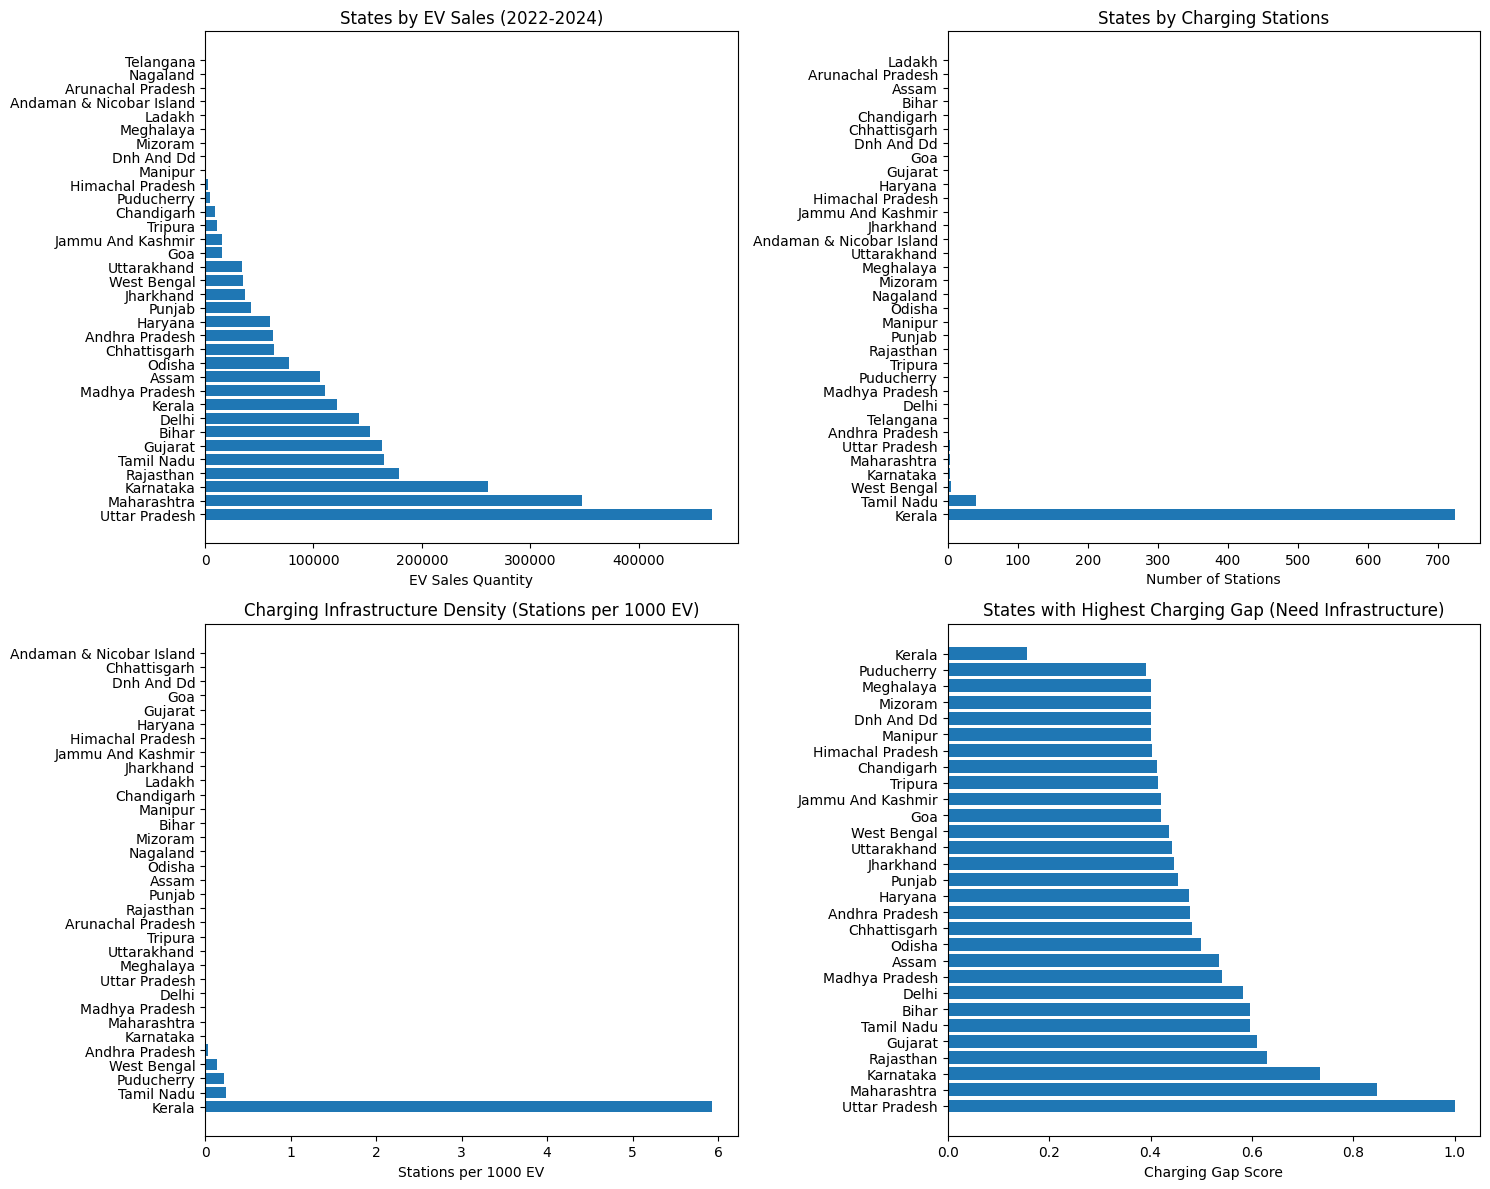

In [ ]:
# Visualize the gap analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Top 10 states by EV sales
top_ev_states = gap_analysis.sort_values('EV_Sales_Quantity', ascending=False)
ax1.barh(top_ev_states['State'], top_ev_states['EV_Sales_Quantity'])
ax1.set_title('States by EV Sales (2022-2024)')
ax1.set_xlabel('EV Sales Quantity')

# Top 10 states by charging stations
top_station_states = gap_analysis.sort_values('Station_Count', ascending=False)
ax2.barh(top_station_states['State'], top_station_states['Station_Count'])
ax2.set_title('States by Charging Stations')
ax2.set_xlabel('Number of Stations')

# Stations per 1000 EV
gap_sorted = gap_analysis[gap_analysis['EV_Sales_Quantity'] > 0].sort_values('Stations_per_1000_EV', ascending=False)
ax3.barh(gap_sorted['State'], gap_sorted['Stations_per_1000_EV'])
ax3.set_title('Charging Infrastructure Density (Stations per 1000 EV)')
ax3.set_xlabel('Stations per 1000 EV')

# Charging Gap Score (highest need)
high_need_states = gap_analysis[gap_analysis['EV_Sales_Quantity'] > 100].sort_values('Charging_Gap_Score', ascending=False)
ax4.barh(high_need_states['State'], high_need_states['Charging_Gap_Score'])
ax4.set_title('States with Highest Charging Gap (Need Infrastructure)')
ax4.set_xlabel('Charging Gap Score')

plt.tight_layout()
plt.show()

In [ ]:
# Enhanced summary with more context
detailed_summary = gap_analysis[[
    'State',
    'Station_Count',
    'EV_Sales_Quantity',
    'Stations_per_1000_EV',
    'EV_Sales_Normalized',
    'Station_Density_Normalized',
    'Charging_Gap_Score',
    'Priority'
]].sort_values('Charging_Gap_Score', ascending=False)

# Add interpretation column
def interpret_gap(row):
    if row['Priority'] == 'High':
        return 'Urgent: High demand, low infrastructure'
    elif row['Priority'] == 'Medium':
        return 'Moderate: Balanced growth needed'
    else:
        return 'Adequate: Well-served or low demand'

detailed_summary['Interpretation'] = detailed_summary.apply(interpret_gap, axis=1)

print("\n=== DETAILED SUMMARY (TOP 20) ===")
print(detailed_summary.head(20).to_string(index=False))

# Save detailed version
detailed_summary.to_csv('detailed_gap_analysis.csv', index=False)
print("\n✓ Detailed analysis saved to 'detailed_gap_analysis.csv'")


=== DETAILED SUMMARY (TOP 20) ===
            State  Station_Count  EV_Sales_Quantity  Stations_per_1000_EV  EV_Sales_Normalized  Station_Density_Normalized  Charging_Gap_Score Priority                          Interpretation
    Uttar Pradesh            3.0           467843.0              0.006412             1.000000                    0.001081            0.999568     High Urgent: High demand, low infrastructure
      Maharashtra            4.0           348151.0              0.011489             0.744162                    0.001937            0.845722     High Urgent: High demand, low infrastructure
        Karnataka            4.0           261095.0              0.015320             0.558083                    0.002583            0.733816     High Urgent: High demand, low infrastructure
        Rajasthan            0.0           179351.0              0.000000             0.383357                    0.000000            0.630014     High Urgent: High demand, low infrastructure
     

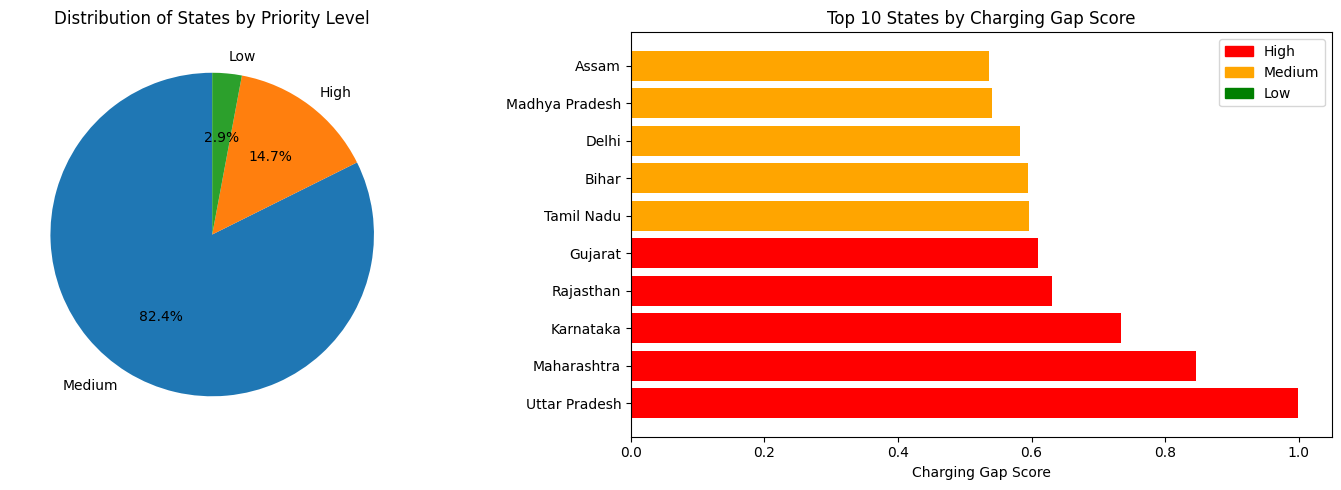

In [ ]:
# Summary visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Priority distribution
priority_counts = gap_analysis['Priority'].value_counts()
ax1.pie(priority_counts, labels=priority_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribution of States by Priority Level')

# Top 10 gap scores
top_10_gap = gap_analysis.nlargest(10, 'Charging_Gap_Score')
colors = top_10_gap['Priority'].map({'High': 'red', 'Medium': 'orange', 'Low': 'green'})
ax2.barh(top_10_gap['State'], top_10_gap['Charging_Gap_Score'], color=colors)
ax2.set_xlabel('Charging Gap Score')
ax2.set_title('Top 10 States by Charging Gap Score')
ax2.legend(handles=[
    plt.Rectangle((0,0),1,1, color='red', label='High'),
    plt.Rectangle((0,0),1,1, color='orange', label='Medium'),
    plt.Rectangle((0,0),1,1, color='green', label='Low')
])

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd


In [ ]:
gap_analysis = pd.read_csv('detailed_gap_analysis.csv')  # or whichever CSV file


In [ ]:
features = ['Station_Count', 'Stations_per_1000_EV', 'Charging_Gap_Score']
X = gap_analysis[features]
y = gap_analysis['EV_Sales_Quantity']


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# We use the gap_analysis dataframe created in your previous step
# Selecting our 'Predictors' (Features) and 'Target' (EV Sales)
features = ['Station_Count', 'Stations_per_1000_EV', 'Charging_Gap_Score']
X = gap_analysis[features]
y = gap_analysis['EV_Sales_Quantity']

# Split data into training (to teach the model) and testing (to check it)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Prepared for Machine Learning Training.")

Data Prepared for Machine Learning Training.


In [ ]:
# Initialize and train the model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Performance Check
preds = model.predict(X_test)
print(f"Model Training Complete. Mean Absolute Error: {mean_absolute_error(y_test, preds):.2f}")

Model Training Complete. Mean Absolute Error: 2786.15


In [ ]:
# Create a 'Future' scenario dataframe
forecast_df = gap_analysis.copy()

# Simulation: Increase infrastructure by 50% to see growth potential
forecast_df['Station_Count'] = forecast_df['Station_Count'] * 1.50
forecast_df['Stations_per_1000_EV'] = forecast_df['Stations_per_1000_EV'] * 1.50

# Use the model to predict future sales based on this simulated growth
forecast_df['Predicted_Sales_24m'] = model.predict(forecast_df[features])

# Calculate the 'Spike' percentage (Current Sales vs Forecasted Sales)
forecast_df['Adoption_Spike_Potential'] = ((forecast_df['Predicted_Sales_24m'] - forecast_df['EV_Sales_Quantity']) /
                                            forecast_df['EV_Sales_Quantity'].replace(0, 1)) * 100

# Get the Top 5 states most likely to see a massive spike
top_spikes = forecast_df.sort_values(by='Adoption_Spike_Potential', ascending=False).head(5)

print("\n--- Top 5 States Forecasted for EV Adoption Spikes ---")
print(top_spikes[['State', 'EV_Sales_Quantity', 'Predicted_Sales_24m', 'Adoption_Spike_Potential']])


--- Top 5 States Forecasted for EV Adoption Spikes ---
                       State  EV_Sales_Quantity  Predicted_Sales_24m  \
31                 Telangana                0.0            77.688988   
30                  Nagaland                9.0            77.688988   
29         Arunachal Pradesh               30.0            77.688988   
28  Andaman & Nicobar Island               51.0            77.688988   
25                   Mizoram              231.0           245.090393   

    Adoption_Spike_Potential  
31               7768.898773  
30                763.210975  
29                158.963292  
28                 52.331348  
25                  6.099737  


/tmp/ipython-input-609862189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_spikes, x='State', y='Adoption_Spike_Potential', palette='rocket')


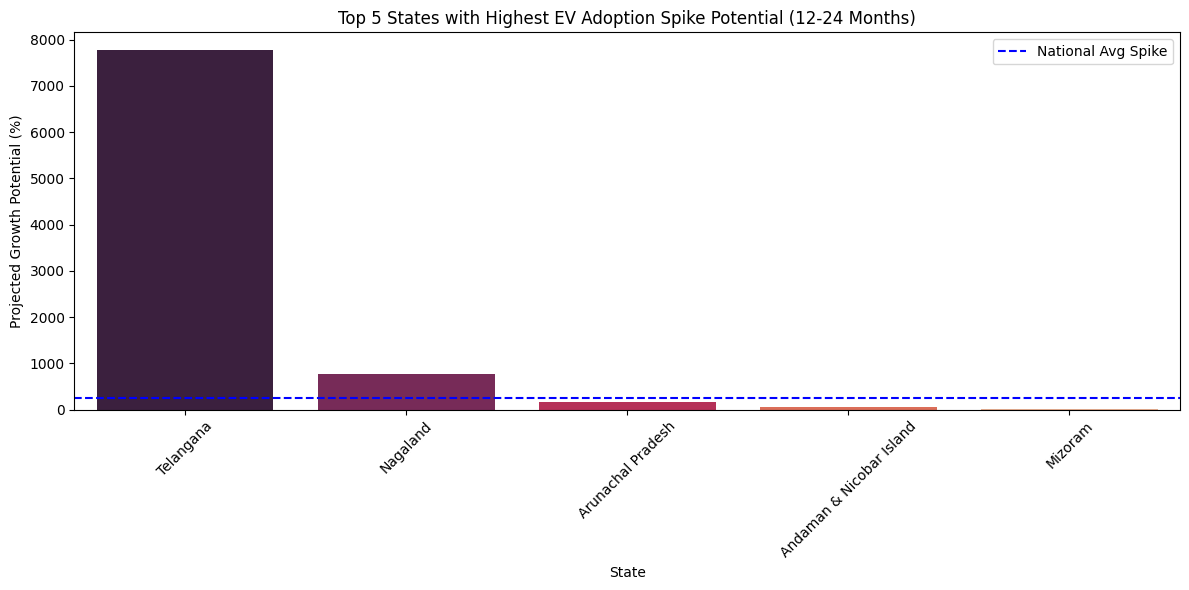

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(data=top_spikes, x='State', y='Adoption_Spike_Potential', palette='rocket')
plt.title('Top 5 States with Highest EV Adoption Spike Potential (12-24 Months)')
plt.ylabel('Projected Growth Potential (%)')
plt.xlabel('State')
plt.xticks(rotation=45)

# Adding a horizontal line to show average growth
plt.axhline(forecast_df['Adoption_Spike_Potential'].mean(), color='blue', linestyle='--', label='National Avg Spike')
plt.legend()

plt.tight_layout()
plt.show()